<a href="https://colab.research.google.com/github/brayanb1701/Fisica-3-Lab-3/blob/main/Lab_3_Lab_Fisica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit,fsolve, fmin, minimize_scalar
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
MAA_A = pd.read_excel("Datos_Lab_3.xlsx", 'Fase 2')
MAA_A

,Ciclo,A1-0,A2-0,A3-0,A1-0.2,A2-0.2,A3-0.2,A1-0.4,A2-0.4,A3-0.4,A1-0.6,A2-0.6,A3-0.6,A0,A0.2,A0.4,A0.6
0,1,13.8,13.8,13.80,12.8,12.8,12.8,10.2,10.4,10.4,7.4,7.4,7.4,13.800000,12.800000,10.333333,7.400000
1,2,13.6,13.6,13.65,11.8,11.6,11.6,7.4,7.8,7.4,3.8,4.0,4.0,13.616667,11.666667,7.533333,3.933333
2,3,13.4,13.4,13.40,10.8,10.6,10.6,5.6,5.8,5.8,2.0,2.0,2.0,13.400000,10.666667,5.733333,2.000000
3,4,13.2,13.2,13.20,9.8,9.6,9.7,4.2,4.2,4.2,0.8,0.8,1.0,13.200000,9.700000,4.200000,0.866667
4,5,12.8,13.0,13.00,9.0,8.8,8.8,3.1,3.1,3.0,0.1,0.3,0.3,12.933333,8.866667,3.066667,0.233333
5,6,12.6,12.8,12.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.733333,NaN,NaN,NaN
6,7,12.4,12.6,12.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.533333,NaN,NaN,NaN
7,8,12.2,12.4,12.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.333333,NaN,NaN,NaN
8,9,12.0,12.2,12.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.106667,NaN,NaN,NaN
9,10,11.8,12.1,11.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.900000,NaN,NaN,NaN


In [ ]:
MAA_Al = np.array([np.array(MAA_A['A0'][0:10]),np.array(MAA_A['A0.2'][0:5]),np.array(MAA_A['A0.4'][0:5]),np.array(MAA_A['A0.6'][0:5])],dtype='object')
print(MAA_Al)

[array([13.8       , 13.61666667, 13.4       , 13.2       , 12.93333333,
        12.73333333, 12.53333333, 12.33333333, 12.10666667, 11.9       ])
 array([12.8       , 11.66666667, 10.66666667,  9.7       ,  8.86666667])
 array([10.33333333,  7.53333333,  5.73333333,  4.2       ,  3.06666667])
 array([7.4       , 3.93333333, 2.        , 0.86666667, 0.23333333])]


In [ ]:
MAA_T = pd.read_excel("Datos_Lab_3.xlsx", 'Fase 3')
MAA_T = np.array([MAA_T['T0'][0], MAA_T['T0.2'][0], MAA_T['T0.4'][0], MAA_T['T0.6'][0]])
print(MAA_T)

[1.85366667 1.86488    1.88336    1.89662   ]


## Calculando directamente el coeficiente de amortiguamiento y promediando estos:

In [ ]:
coef_amort = []
for idx,A_l in enumerate(MAA_Al):
  coef_am = []
  for idx2,j in enumerate(A_l[1:]):
    coef_am.append(np.log(A_l[0]/j)/((idx2+1)*MAA_T[idx]))
  coef_amort.append(np.array(coef_am))
coef_amort = np.array(coef_amort, dtype='object')
print(coef_amort)

[array([0.00721492, 0.00793397, 0.00799348, 0.00874761, 0.00867959,
        0.00865643, 0.00865951, 0.00882793, 0.00887911])
 array([0.04971333, 0.04888292, 0.04956875, 0.04921848])
 array([0.16780504, 0.15639013, 0.15934118, 0.16125219])
 array([0.33322055, 0.34491169, 0.37691276, 0.45564837])]


In [ ]:
prom_coef_amort=[np.mean(i) for i in coef_amort]
std_coef_amort=[np.std(i) for i in coef_amort]
print('Coeficientes de amortiguamiento para cada corriente: '+str(prom_coef_amort))
print('Desviaciones para cada coeficiente de amortiguamiento: '+str(std_coef_amort))

Coeficientes de amortiguamiento para cada corriente: [0.00839917461077515, 0.04934586933987224, 0.16119713377817896, 0.37767334214544096]
Desviaciones para cada coeficiente de amortiguamiento: [0.000530369252192512, 0.0003222006039968305, 0.004189848834388506, 0.04777567333287964]


## Calculando el decaimiento logaritmico, promediando y obteniendo a partir de esto el coeficiente de amortiguamiento (es equivalente al proceso anterior):

In [ ]:
dec_logs = []
for idx,A_l in enumerate(MAA_Al):
  dec_log = []
  for idx2,j in enumerate(A_l[1:]):
    dec_log.append(np.log(A_l[0]/j)/((idx2+1)))
  dec_logs.append(np.array(dec_log))
dec_logs = np.array(dec_logs, dtype='object')
print(dec_logs)

mean_dec_logs=[np.mean(i) for i in dec_logs]
std_dec_logs=[np.std(i) for i in dec_logs]
print('Decaimiento logarítmico para cada corriente: '+str(mean_dec_logs))
print('Desviación para cada decaimiento logarítmico: '+str(std_dec_logs))

coef_amort = [mean_dec_logs[idx]/MAA_T[idx] for idx in range(4) ]
std_coef_amort = [std_dec_logs[idx]/MAA_T[idx] for idx in range(4) ]
print('Coeficientes de amortiguamiento para cada corriente: '+str(coef_amort))
print('Desviaciones para cada coeficiente de amortiguamiento: '+str(std_coef_amort))

[array([0.01337406, 0.01470694, 0.01481725, 0.01621516, 0.01608907,
        0.01604614, 0.01605185, 0.01636404, 0.01645891])
 array([0.0927094 , 0.09116078, 0.09243976, 0.09178656])
 array([0.3160373 , 0.29453891, 0.3000968 , 0.30369593])
 array([0.63199276, 0.65416641, 0.71486028, 0.86419181])]
Decaimiento logarítmico para cada corriente: [0.015569270003506866, 0.09202412481454095, 0.3035922338724712, 0.7163028141798863]
Desviación para cada decaimiento logarítmico: [0.0009831278038141867, 0.0006008654623816122, 0.007890993700733925, 0.09061229755660617]
Coeficientes de amortiguamiento para cada corriente: [0.008399174610775148, 0.04934586933987224, 0.16119713377817899, 0.377673342145441]
Desviaciones para cada coeficiente de amortiguamiento: [0.0005303692521925123, 0.00032220060399683207, 0.0041898488343885, 0.04777567333287964]


In [ ]:
def exponential(t, A0, coef):
    return A0*np.exp(-coef*t)
def exponential2(t, coef):
    return 14*np.exp(-coef*t)
coef_amort_ajuste1 = []
coef_amort_ajuste2 = []
for idx,A_l in enumerate(MAA_Al):
  t=np.array([(i+1)*MAA_T[idx] for i in range(len(A_l))])
  coef1, pcov1 = curve_fit(exponential, t, A_l)
  coef2, pcov2 = curve_fit(exponential2, t, A_l)
  coef_amort_ajuste1.append(coef1[1])
  coef_amort_ajuste2.append(coef2[0])
  R_S1 = r2_score(A_l,exponential(t, *coef1))
  RMSE1 = mean_squared_error(A_l,exponential(t, *coef1), squared=False)
  print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))
  print("Coeficiente de amortiguamiento para 1: "+str(coef1))

  R_S2 = r2_score(A_l,exponential2(t, *coef2))
  RMSE2 = mean_squared_error(A_l,exponential2(t, *coef2), squared=False)
  print("R^2 y RMSE para 2: "+str(R_S2)+" "+str(RMSE2))
  print("Coeficiente de amortiguamiento para 2: "+str(coef2)+"\n")


R^2 y RMSE para 1: 0.9990034057910947 0.019351952560434905
Coeficiente de amortiguamiento para 1: [1.40679333e+01 8.95007204e-03]
R^2 y RMSE para 2: 0.9966227529279021 0.03562435648554416
Coeficiente de amortiguamiento para 2: [0.00856629]

R^2 y RMSE para 1: 0.9999386751075338 0.01090660066564866
Coeficiente de amortiguamiento para 1: [14.0304016   0.04927583]
R^2 y RMSE para 2: 0.9998773251448481 0.015425838897774075
Coeficiente de amortiguamiento para 2: [0.0489302]

R^2 y RMSE para 1: 0.9994404364438616 0.06067356584719862
Coeficiente de amortiguamiento para 1: [13.91422893  0.15949967]
R^2 y RMSE para 2: 0.9993745596618216 0.06414573013191403
Coeficiente de amortiguamiento para 2: [0.1607447]

R^2 y RMSE para 1: 0.9966546949786216 0.14942623998191995
Coeficiente de amortiguamiento para 1: [14.69543589  0.35736734]
R^2 y RMSE para 2: 0.9955630335507741 0.17208859132938203
Coeficiente de amortiguamiento para 2: [0.34254851]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
for idx,A_l in enumerate(MAA_Al):
  t=np.array([(i+1)*MAA_T[idx] for i in range(len(A_l))])

  R_S1 = r2_score(A_l,exponential(t, 14,coef_amort[idx]))
  RMSE1 = mean_squared_error(A_l,exponential(t, 14,coef_amort[idx]), squared=False)
  print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))
  
  R_S2 = r2_score(A_l,exponential2(t, coef_amort[idx]))
  RMSE2 = mean_squared_error(A_l,exponential2(t, coef_amort[idx]), squared=False)
  print("R^2 y RMSE para 2: "+str(R_S2)+" "+str(RMSE2)+"\n")

R^2 y RMSE para 1: 0.9951132390808243 0.04285249936366125
R^2 y RMSE para 2: 0.9951132390808243 0.04285249936366125

R^2 y RMSE para 1: 0.9995556003948167 0.029360121380780344
R^2 y RMSE para 2: 0.9995556003948167 0.029360121380780344

R^2 y RMSE para 1: 0.9993494408047136 0.06542115672847923
R^2 y RMSE para 2: 0.9993494408047136 0.06542115672847923

R^2 y RMSE para 1: 0.9751825324198115 0.4069937488639461
R^2 y RMSE para 2: 0.9751825324198115 0.4069937488639461



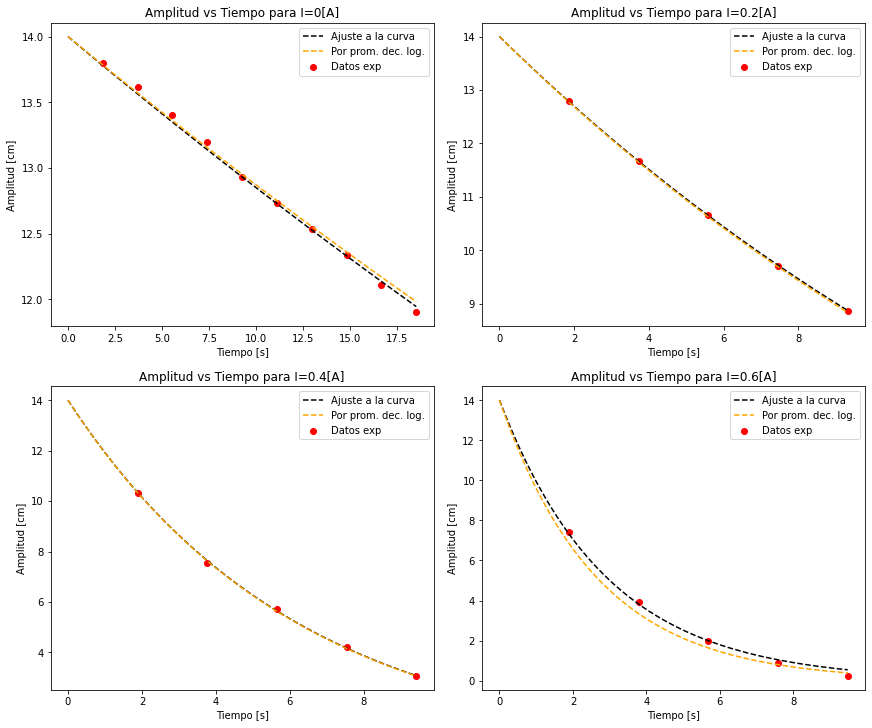

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(12,10),constrained_layout=True)
corr=[0,0.2,0.4,0.6]
for idx,A_l in enumerate(MAA_Al):
  t0=np.array([(i+1)*MAA_T[idx] for i in range(len(A_l))])
  t=np.linspace(0,len(A_l)*MAA_T[idx],100)
  if idx<=1:
    axs[0, idx].plot(t, exponential2(t,coef_amort_ajuste2[idx]),color='black',linestyle='--', label='Ajuste a la curva')
    axs[0, idx].plot(t, exponential2(t,coef_amort[idx]),color='orange',linestyle='--', label='Por prom. dec. log.')
    axs[0, idx].scatter(t0, A_l, color='r', label='Datos exp')
    axs[0, idx].set(xlabel='Tiempo [s]', ylabel='Amplitud [cm]')
    axs[0, idx].set_title('Amplitud vs Tiempo para I='+str(corr[idx])+"[A]")
    axs[0, idx].legend()
  else:
    axs[1, idx-2].plot(t, exponential2(t,coef_amort_ajuste2[idx]),color='black',linestyle='--', label='Ajuste a la curva')
    axs[1, idx-2].plot(t, exponential2(t,coef_amort[idx]),color='orange',linestyle='--', label='Por prom. dec. log.')
    axs[1, idx-2].scatter(t0, A_l, color='r', label='Datos exp')
    axs[1, idx-2].set(xlabel='Tiempo [s]', ylabel='Amplitud [cm]')
    axs[1, idx-2].set_title('Amplitud vs Tiempo para I='+str(corr[idx])+'[A]')
    axs[1, idx-2].legend()
    

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html



In [ ]:
MAF = pd.read_excel("Datos_Lab_3.xlsx", 'Fase 4')
MAF

,t0,w0,A0,t0.2,w0.2,A0.2,t0.4,w0.4,A0.4,t0.6,w0.6,A0.6
0,23.74,1.323333,0.3,20.73,3.030963,1.40,24.86,2.527428,1.1,25.15,2.498284,1.0
1,23.00,2.731820,1.2,19.48,3.225454,3.50,22.36,2.810011,1.6,21.03,2.987725,1.8
2,22.60,2.780170,2.5,18.59,3.379874,8.80,21.44,2.930590,2.4,19.92,3.154209,2.0
3,18.89,3.326197,3.5,17.74,3.541818,2.20,18.65,3.369000,4.8,18.83,3.336795,2.1
4,18.70,3.359992,7.2,17.41,3.608952,1.59,17.79,3.531864,2.6,18.40,3.414775,2.0
5,18.58,3.381693,20.0,17.00,3.695991,1.00,17.44,3.602744,2.3,16.63,3.778223,1.1
6,15.75,3.989324,2.5,15.52,4.048444,0.50,15.29,4.109343,0.9,15.89,3.954176,0.8
7,13.56,4.633617,0.3,13.39,4.692446,0.30,13.38,4.695953,0.6,13.23,4.749195,0.4


In [ ]:
MAF_A = [MAF['A0'][:9],MAF['A0.2'][:9],MAF['A0.4'][:9],MAF['A0.6'][:9]]
MAF_w = [MAF['w0'][:9],MAF['w0.2'][:9],MAF['w0.4'][:9],MAF['w0.6'][:9]]

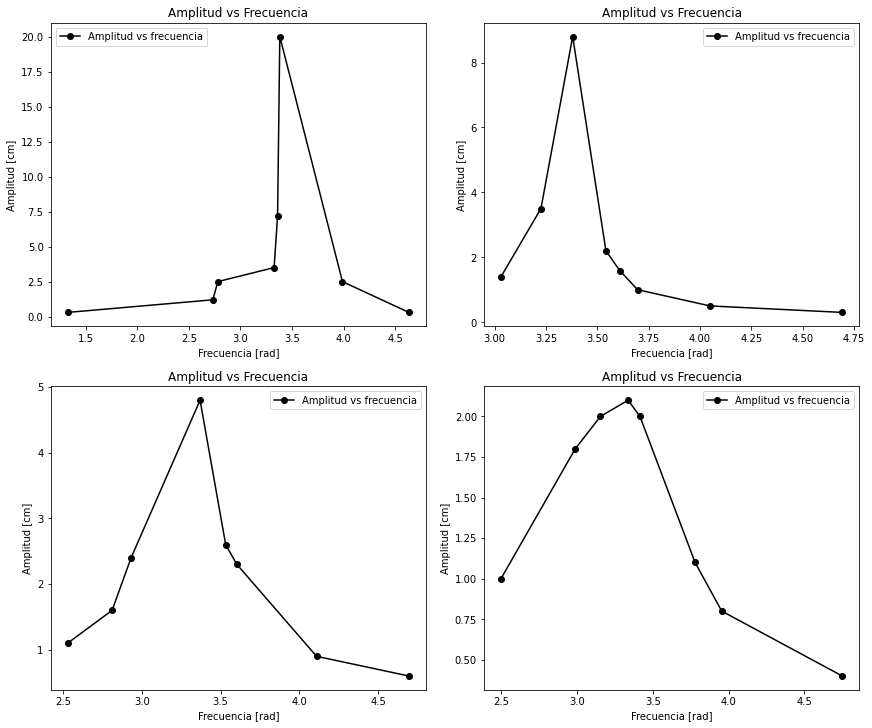

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(12,10),constrained_layout=True)
for idx,A_l in enumerate(MAF_A):
  if idx<=1:
    axs[0, idx].plot(MAF_w[idx], A_l,'o-',color='black', label='Amplitud vs frecuencia')
    axs[0, idx].set(xlabel='Frecuencia [rad]', ylabel='Amplitud [cm]')
    axs[0, idx].set_title('Amplitud vs Frecuencia')
    axs[0, idx].legend()
  else:
    axs[1, idx-2].plot(MAF_w[idx], A_l, 'o-',color='black', label='Amplitud vs frecuencia')
    axs[1, idx-2].set(xlabel='Frecuencia [rad]', ylabel='Amplitud [cm]')
    axs[1, idx-2].set_title('Amplitud vs Frecuencia')
    axs[1, idx-2].legend()

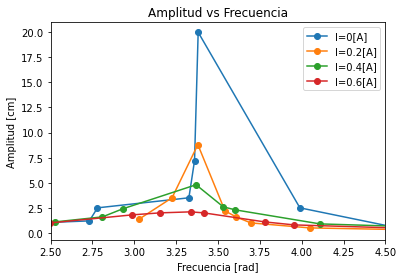

In [ ]:
corrientes = [0, 0.2, 0.4, 0.6]
for idx,A_l in enumerate(MAF_A):
    plt.plot(MAF_w[idx], A_l,'o-', label='I='+str(corrientes[idx])+'[A]')
    plt.xlabel('Frecuencia [rad]')
    plt.ylabel('Amplitud [cm]')
    plt.title('Amplitud vs Frecuencia')
    plt.xlim([2.5,4.5])
    plt.legend()

#PRUEBA PARA CADA W0 OBTENIDA

In [ ]:
MAA_w = pd.read_excel("Datos_Lab_3.xlsx", 'Fase 3')
MAA_w = np.array([MAA_w['w0'][0], MAA_w['w0.2'][0], MAA_w['w0.4'][0], MAA_w['w0.6'][0]])
frec_nat = np.sqrt(np.power(MAA_w,2)+np.power(coef_amort_ajuste2,2))
frec_nat

array([3.38960908, 3.36957223, 3.34002765, 3.33049574])

In [ ]:
wr_teo = np.sqrt(np.power(frec_nat,2)-2*np.power(coef_amort_ajuste2,2))
wr_teo

array([3.38958744, 3.36886163, 3.33228255, 3.29507556])

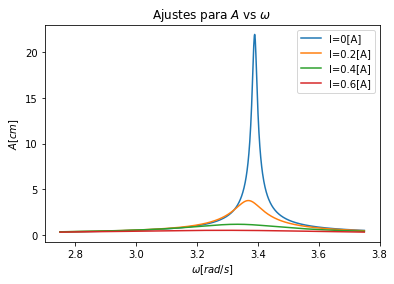

In [ ]:
def amp_f(param, num):
    return (num)/np.sqrt((param[0]**2-param[1]**2)**2+4*param[2]**2*param[0]**2)
num=5/4
w=np.linspace(2.75,3.75,1000)
corrientes = [0,0.2,0.4,0.6]
for idx,wi in enumerate(MAF_w):
  plt.plot(w, amp_f([w,frec_nat[idx],coef_amort[idx]],num), label='I='+str(corrientes[idx])+'[A]')
  plt.title("Ajustes para $A$ vs $\omega$")
  plt.legend()
  plt.xlabel('$\omega[rad/s]$')
  plt.ylabel('$A[cm]$')

In [ ]:
np.max(amp_f([w,frec_nat[3],coef_amort[3]],num))

0.4958768660873926

In [ ]:
coef_MAFs = []
for idx,w in enumerate(MAF_w):
  
  def amp_f_fit(x,num):
    return amp_f([x,frec_nat[idx],coef_amort[idx]],num)
  
  coef_MAF, pcov = curve_fit(amp_f_fit, w, MAF_A[idx], p0=[5/4])
  coef_MAFs.append(coef_MAF)
  print(amp_f_fit(w, *coef_MAF))
  R_S1 = r2_score(MAF_A[idx],amp_f_fit(w, *coef_MAF))
  RMSE1 = mean_squared_error(MAF_A[idx],amp_f_fit(w, *coef_MAF), squared=False)
  print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))

0     0.160093
1     0.387156
2     0.414592
3     3.629731
4     7.505501
5    19.960768
6     0.352262
7     0.156195
Name: w0, dtype: float64
R^2 y RMSE para 1: 0.967680400362165 1.105349272796324
0    1.375112
1    3.001455
2    8.829470
3    2.424818
4    1.761355
5    1.288440
6    0.595543
7    0.281825
Name: w0.2, dtype: float64
R^2 y RMSE para 1: 0.9921516107693934 0.2298361386009803
0    1.078781
1    1.542366
2    1.907369
3    4.729088
4    2.995548
5    2.413096
6    0.887120
7    0.474334
Name: w0.4, dtype: float64
R^2 y RMSE para 1: 0.965283331007682 0.23363762006768077
0    1.005899
1    1.673884
2    1.981249
3    2.076975
4    1.982253
5    1.224739
6    0.962936
7    0.435906
Name: w0.6, dtype: float64
R^2 y RMSE para 1: 0.979686613647067 0.08698698992646858


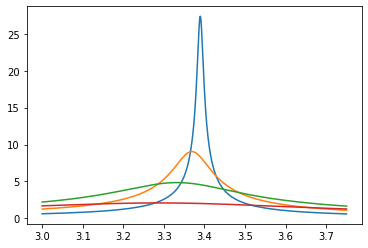

In [ ]:
w=np.linspace(3,3.75,1000)
for idx,wi in enumerate(MAF_w):
  plt.plot(w, amp_f([w,frec_nat[idx],coef_amort[idx]],*coef_MAFs[idx]))

In [ ]:
np.max(amp_f([w,frec_nat[3],coef_amort[3]],*coef_MAFs[3]))

2.094703717024083

In [ ]:
coef_MAFs

[array([1.5590275]),
 array([3.00851004]),
 array([5.21808661]),
 array([5.23561124])]

Encontrar maximos:

In [ ]:
def amp_f_max(w,wr,coef_amort, num):
    return (num)/np.sqrt((w**2-wr**2)**2+4*coef_amort**2*w**2)
w=np.linspace(3,3.75,1000)
wr_calc=[]
for idx,wi in enumerate(MAF_w):
  max_x = fmin(lambda x: -amp_f_max(x,frec_nat[idx],coef_amort[idx],*coef_MAFs[idx]), 3)
  max = minimize_scalar(lambda x: -amp_f_max(x,frec_nat[idx],coef_amort[idx],*coef_MAFs[idx]),bounds=(0, 5), method='bounded')
  wr_calc.append(max['x'])
# array([ 1.])

Optimization terminated successfully.
         Current function value: -27.380310
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -9.047789
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: -4.851547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: -2.094704
         Iterations: 13
         Function evaluations: 26


In [ ]:
print(wr_calc)

[3.389586670637963, 3.368850348839024, 3.3322388447179963, 3.2873907097383173]


#PRUEBA CON W0 SOLO SIN AMORTIGUAMIENTO

In [ ]:
MAA_w = pd.read_excel("Datos_Lab_3.xlsx", 'Fase 3')
MAA_w = np.array([MAA_w['w0'][0], MAA_w['w0.2'][0], MAA_w['w0.4'][0], MAA_w['w0.6'][0]])
frec_nat = np.sqrt(np.power(MAA_w,2)+np.power(coef_amort_ajuste2,2))
frec_nat

array([3.38960908, 3.36957223, 3.34002765, 3.33049574])

In [ ]:
wr_teo = np.sqrt(np.power(frec_nat[0],2)-2*np.power(coef_amort_ajuste2,2))
wr_teo

array([3.38958744, 3.38890269, 3.38197753, 3.35481308])

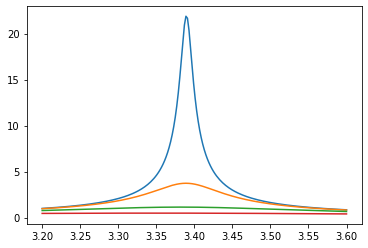

In [ ]:
def amp_f(param, num):
    return (num)/np.sqrt((param[0]**2-param[1]**2)**2+4*param[2]**2*param[0]**2)
num=5/4
w=np.linspace(3.2,3.6,200)
for idx,wi in enumerate(MAF_w):
  plt.plot(w, amp_f([w,frec_nat[0],coef_amort[idx]],num))

In [ ]:
np.max(amp_f([w,frec_nat[0],coef_amort[3]],num))

0.4912768756396778

In [ ]:
coef_MAFs = []
for idx,w in enumerate(MAF_w):
  
  def amp_f_fit(x,num):
    return amp_f([x,frec_nat[0],coef_amort[idx]],num)
  
  coef_MAF, pcov = curve_fit(amp_f_fit, w, MAF_A[idx], p0=[5/4])
  coef_MAFs.append(coef_MAF[0])
  print(amp_f_fit(w, *coef_MAF))
  R_S1 = r2_score(MAF_A[idx],amp_f_fit(w, *coef_MAF))
  RMSE1 = mean_squared_error(MAF_A[idx],amp_f_fit(w, *coef_MAF), squared=False)
  print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))

0     0.160093
1     0.387156
2     0.414592
3     3.629731
4     7.505501
5    19.960768
6     0.352262
7     0.156195
Name: w0, dtype: float64
R^2 y RMSE para 1: 0.967680400362165 1.105349272796324
0    1.287855
1    2.642726
2    8.795183
3    2.690676
4    1.897679
5    1.358486
6    0.608228
7    0.283733
Name: w0.2, dtype: float64
R^2 y RMSE para 1: 0.9772785599984058 0.3910623231998699
0    0.957816
1    1.335309
2    1.621826
3    4.518819
4    3.287203
5    2.618868
6    0.890386
7    0.463737
Name: w0.4, dtype: float64
R^2 y RMSE para 1: 0.8912864391057725 0.4134429682704532
0    0.952230
1    1.555107
2    1.871815
3    2.086383
4    2.054368
5    1.331657
6    1.039281
7    0.456535
Name: w0.6, dtype: float64
R^2 y RMSE para 1: 0.9342470043746437 0.15650236698032788


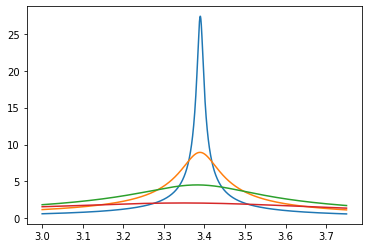

In [ ]:
w=np.linspace(3,3.75,2000)
for idx,wi in enumerate(MAF_w):
  plt.plot(w, amp_f([w,frec_nat[0],coef_amort[idx]],*coef_MAFs[idx]))

In [ ]:
np.max(amp_f([w,frec_nat[0],coef_amort[3]],*coef_MAFs[3]))

2.0871718883069397

In [ ]:
coef_MAFs

[1.5590275035151477, 2.990481683171093, 4.948292323016837, 5.310574713071625]

Encontrar maximos:

In [ ]:
def amp_f_max(w,wr,coef_amort, num):
    return (num)/np.sqrt((w**2-wr**2)**2+4*coef_amort**2*w**2)
w=np.linspace(3,3.75,1000)
wr_calc=[]
for idx,wi in enumerate(MAF_w):
  max_x = fmin(lambda x: -amp_f_max(x,frec_nat[0],coef_amort[idx],*coef_MAFs[idx]), 3)
  max = minimize_scalar(lambda x: -amp_f_max(x,frec_nat[0],coef_amort[idx],*coef_MAFs[idx]),bounds=(0, 5), method='bounded')
  wr_calc.append(max['x'])
# array([ 1.])

Optimization terminated successfully.
         Current function value: -27.380310
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -8.940395
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: -4.533254
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: -2.087172
         Iterations: 13
         Function evaluations: 26


In [ ]:
print(wr_calc)

[3.389586670637963, 3.388890535126276, 3.381933974916064, 3.347264134773633]


In [ ]:
wr_calc=np.array(wr_calc)
err = abs((wr_teo-wr_calc)/wr_teo)*100

In [ ]:
print(err)

[0.14766673 1.25881613 3.1138308  3.05254796]


#CALCULANDO TODOS LOS PARAMETROS

In [ ]:
MAA_w = pd.read_excel("Datos_Lab_3.xlsx", 'Fase 3')
MAA_w = np.array([MAA_w['w0'][0], MAA_w['w0.2'][0], MAA_w['w0.4'][0], MAA_w['w0.6'][0]])
frec_nat = np.sqrt(np.power(MAA_w,2)+np.power(coef_amort_ajuste2,2))
frec_nat

array([3.38960908, 3.36957223, 3.34002765, 3.33049574])

In [ ]:
wr_teo = np.sqrt(np.power(frec_nat[0],2)-2*np.power(coef_amort_ajuste2,2))
wr_teo

array([3.38958744, 3.38890269, 3.38197753, 3.35481308])

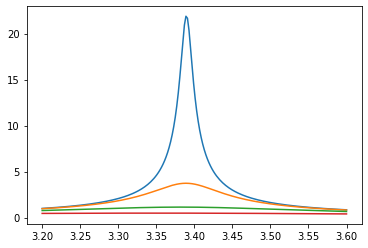

In [ ]:
def amp_f(w, w0, coef_amort, num):
    return (num)/np.sqrt((w**2-w0**2)**2+4*coef_amort**2*w**2)
num=5/4
w=np.linspace(3.2,3.6,200)
for idx,wi in enumerate(MAF_w):
  plt.plot(w, amp_f(w,frec_nat[0],coef_amort[idx],num))

In [ ]:
np.max(amp_f(w,frec_nat[0],coef_amort[3],num))

0.4912768756396778

In [ ]:
coef_MAFs = []
for idx,w in enumerate(MAF_w):
  
  def amp_f_fit(x,num):
    return amp_f([x,frec_nat[0],coef_amort[idx]],num)
  
  coef_MAF, pcov = curve_fit(amp_f, w, MAF_A[idx], p0=[3.38,0.1,5/4])
  coef_MAFs.append(coef_MAF)
  print(amp_f(w, *coef_MAF))
  R_S1 = r2_score(MAF_A[idx],amp_f(w, *coef_MAF))
  RMSE1 = mean_squared_error(MAF_A[idx],amp_f(w, *coef_MAF), squared=False)
  print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))

0     0.178503
1     0.429595
2     0.459773
3     3.794647
4     7.463340
5    19.953106
6     0.397214
7     0.175361
Name: w0, dtype: float64
R^2 y RMSE para 1: 0.9690293443000428 1.0820360836184268
0    1.426730
1    3.485936
2    8.801703
3    2.111626
4    1.567683
5    1.167369
6    0.555715
7    0.266862
Name: w0.2, dtype: float64
R^2 y RMSE para 1: 0.9992304281871757 0.07197018618763085
0    1.190705
1    1.773039
2    2.265817
3    4.798736
4    2.693942
5    2.183830
6    0.851020
7    0.466125
Name: w0.4, dtype: float64
R^2 y RMSE para 1: 0.9921439883643093 0.11114113007930751
0    0.985872
1    1.735236
2    2.080390
3    2.097486
4    1.943730
5    1.113787
6    0.869657
7    0.394373
Name: w0.6, dtype: float64
R^2 y RMSE para 1: 0.9935895902669631 0.048865914762298596


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


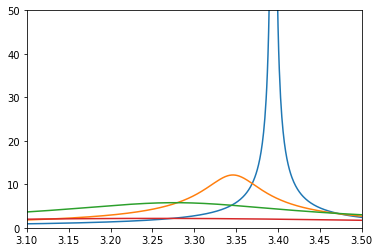

In [ ]:
w=np.linspace(3,3.75,1000)
for idx,wi in enumerate(MAF_w):
  plt.plot(w, amp_f(w,*coef_MAFs[idx]))
  plt.ylim([0,50])
  plt.xlim([3.1,3.5])

In [ ]:
np.max(amp_f(w,*coef_MAFs[3]))

2.1621806525721428

In [ ]:
coef_MAFs

[array([ 3.39459402e+00, -6.57755182e-07,  1.74434228e+00]),
 array([ 3.34662142, -0.03552811,  2.88859925]),
 array([3.28261792, 0.13968437, 5.29165673]),
 array([3.28769639, 0.33971046, 4.80387579])]

Encontrar maximos:

In [ ]:
def amp_f_max(w,wr,coef_amort, num):
    return (num)/np.sqrt((w**2-wr**2)**2+4*coef_amort**2*w**2)
w=np.linspace(3,3.75,1000)
wr_calc=[]
for idx,wi in enumerate(MAF_w):
  max_x = fmin(lambda x: -amp_f_max(x,*coef_MAFs[idx]), 3)
  max = minimize_scalar(lambda x: -amp_f_max(x,*coef_MAFs[idx]),bounds=(0, 5), method='bounded')
  wr_calc.append(max['x'])
# array([ 1.])

Optimization terminated successfully.
         Current function value: -390615.605969
         Iterations: 37
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: -12.147950
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: -5.775466
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: -2.162181
         Iterations: 13
         Function evaluations: 26


In [ ]:
print(wr_calc)

[3.394592727912137, 3.3462426324027255, 3.276668473781442, 3.2524057987268433]
